# Übung 09: Grafiken

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../../src/bigdata/120-years-of-olympic-history-athletes-and-results/athlete_events.csv')
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


## Teilaufgabe 1: 
Vergleiche die Größenverteilung für Männer und Frauen in einem gemeinsamen Boxplot Diagramm

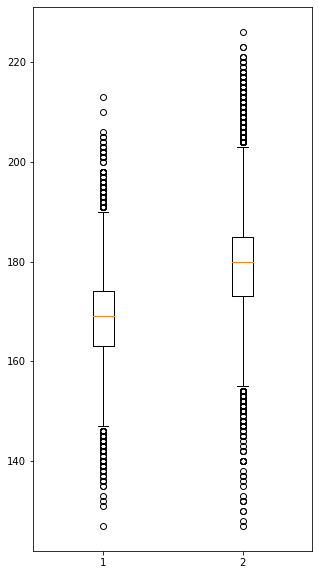

In [28]:
df_athlets = df.drop_duplicates(subset=['ID']).sort_values('Name')

w = df_athlets[df_athlets['Sex'] == 'F']['Height'].dropna()
m = df_athlets[df_athlets['Sex'] == 'M']['Height'].dropna()
data=[w, m]

fig, ax = plt.subplots(figsize=(5, 10))
ax.boxplot(x=data)
plt.show()

## Teilaufgabe 2:
* Darstellung der Medalien Gewinne des Deutschen Teams bei den Winterspielen im Verlaufe der Jahre
* Unterscheide zwischen Gold, Silber, Bronze Medaillien und plotte alle drei Verläufe in einem Graph
* Schau dir die Daten an und finde raus warum der Graph zwischenzeitlich abbricht. Behebe den Fehler

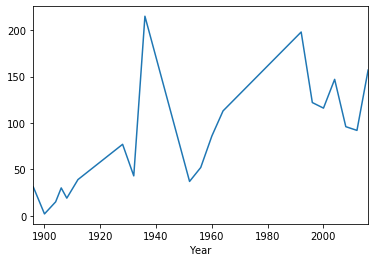

In [27]:
df_ger_summer = df[(df['Team'] == 'Germany') & (df['Season'] == 'Summer')]
df_ger_summer[~df_ger_summer['Medal'].isna()].groupby(['Year']).size().plot()

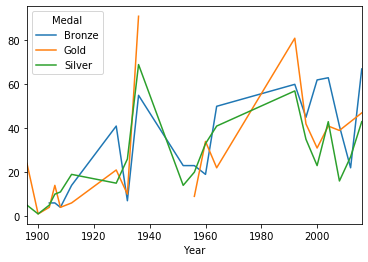

In [30]:
df_result = df_ger_summer[~df_ger_summer['Medal'].isna()].groupby(['Year', 'Medal']).size().unstack()
df_result.plot()

In [35]:
# Der Fehler liegt in den durch das Gruppieren produzierte NaN
df_result.head()

Medal,Bronze,Gold,Silver
Year,,,
1896,2.0,24.0,5.0
1900,NaN,1.0,1.0
1904,6.0,4.0,5.0
1906,6.0,14.0,10.0
1908,4.0,4.0,11.0


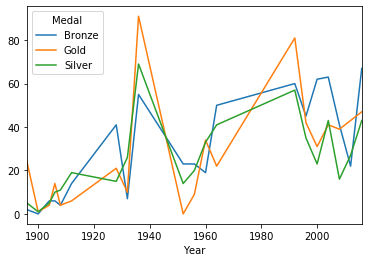

In [36]:
# Wir können diese Werte einfach ergänzen
df_result.fillna(0).plot()

## Teilaufgabe 3:
Erstelle zwei nebeneinander angeordnete Plots mit der Anzahl der Teilnehmer an den Olympischen Spielen pro Jahr. Erstelle für jedes Geschlecht einen Plot. Betrachte nur die Winterspiele! Färbe die beiden Graphen in unterschiedlichen Farben ein.

In [96]:
df_winter = df[df['Season'] == 'Winter']
df_winter = df_winter.groupby(['Year', 'Sex']).size().unstack()
df_winter.head()

Sex,F,M
Year,,
1924,17,443
1928,33,549
1932,22,330
1936,81,814
1948,133,942


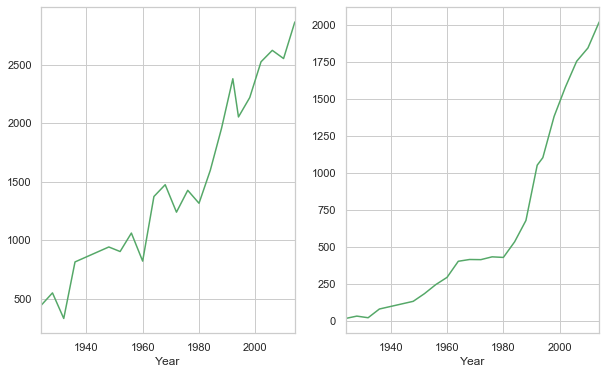

In [95]:
fig, ax = plt.subplots(1,2, figsize=(10, 6))
df_winter['M'].plot(ax=ax[0], color='g')
df_winter['F'].plot(ax=ax[1], color='g')

## Zusatzaufgabe 1:
Erstelle ein Säulendiagramm mit horizontalen Balken. Inhalt die 20 besten Teams(Länder und ihre Medailliengewinne aufgeschlüsselt in **Gold, Silber und Bronze**.<br>
https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

Ändere die Farben der Balken entsprechend, der Medaillienfarbe. Hier findest du eine Map von bekannten **Farbnamen**.<br>
https://matplotlib.org/gallery/color/named_colors.html

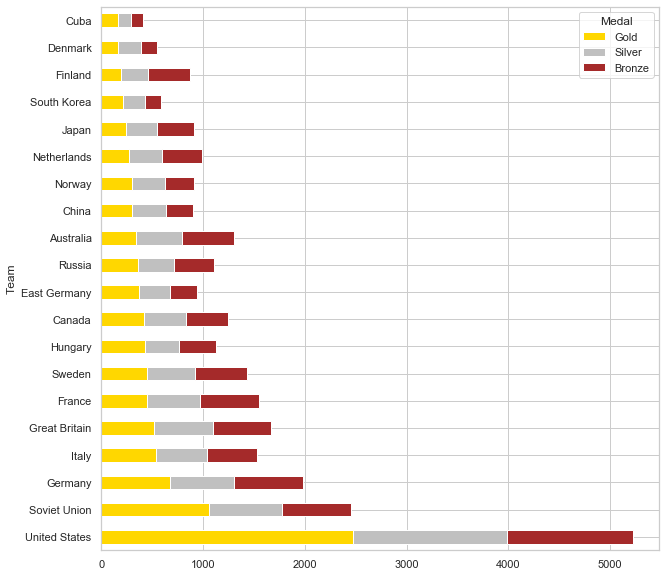

In [76]:
df_medals = df[~df['Medal'].isna()].groupby(['Team', 'Medal']).size().unstack()
df_head = df_medals.sort_values(['Gold', 'Silver', 'Bronze'], ascending=False).head(20)
df_head = df_head[['Gold', 'Silver', 'Bronze']]

df_head.plot.barh(stacked=True, figsize=(10,10), color=['gold', 'silver', 'brown']);

## Zusatzaufgabe 2:
Schau dir den Unterschied zwischen ein BoxPlot und einem ViolinPlot an.Versuche die Daten aus Teilaufgabe 1 in einem ViolinPlot darzustellen. <br>
https://matplotlib.org/gallery/statistics/boxplot_vs_violin.html#sphx-glr-gallery-statistics-boxplot-vs-violin-py

**Tipp:** Die beiden Serien müssen bevor Sie im ViolinPlot benutzt werden könnnen in einer Liste umgewandelt werden, den pylot akzeptiert als Daten keine Serie. Google wie man eine Serie in eine Liste umwandelt.

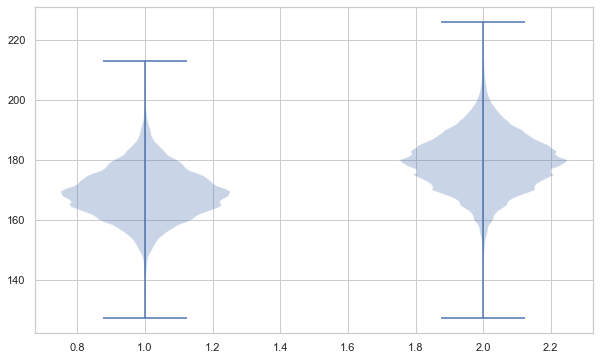

In [124]:
fig, ax = plt.subplots(figsize=(10, 6))

# konvertieren der Serie in listen, da pyplot keine Serien unterstützt
w = df_athlets[df_athlets['Sex'] == 'F']['Height'].dropna().tolist()
m = df_athlets[df_athlets['Sex'] == 'M']['Height'].dropna().tolist()

data=[w, m]

ax.violinplot(data)
plt.show()